CSCI E-82 - Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

# Section 2:  Saturday 15th September 10 AM EDT

*Rashmi Banthia*


### [Text Mining](#text_mining)
- Bag of Words, N-gram, Stop words, Stemming
- TFIDF, Cosine Similarity
- Sentiment Analysis
- Word2Vec


### [Quora Question Pairs](#quora) 
 - Word Cloud    
 - T-SNE 


### [MultiDimensional Scaling (MDS)](#mds) 
- US Cities 
- Amazon - Text Data 


### [Spooky Author Identification](#spooky)
- Latent Semantic Analysis (Truncated SVD)

<a id='text_mining'></a>

# Text Mining

In [137]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords  #pip install nltk
from nltk.stem.porter import PorterStemmer
import string

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from gensim.models import word2vec  #pip install word2vec

from wordcloud import WordCloud  #pip install wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from sklearn.manifold import TSNE, MDS

from textblob import TextBlob  #Sentiment Analysis - pip install textblob
from sklearn.decomposition import TruncatedSVD

#### Bag of Words

Simply count each word in the dataset. We create a matrix, where each row represents a document in our dataset and each column represents a word. The value of the cell is the frequency of that word in the document.

In [138]:
#A demo example for Bag of Words with Scikit Learn - CountVectorizer
document1 = "This is a sample"
document2 = "This is another example this"
corpus = [document1,document2]   
vectorizer = CountVectorizer()    #Is the same as TfidfVectorizer(use_idf=False,norm=None)
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print(vectorizer.get_feature_names())
X.toarray()

(2, 5)
['another', 'example', 'is', 'sample', 'this']


array([[0, 0, 1, 1, 1],
       [1, 1, 1, 0, 2]], dtype=int64)

#### N-Gram 
 An n-gram is a subsequence of n consecutive tokens. 

In [139]:
document1 = "the cow jumps"
document2 = "over the cow"
corpus = [document1,document2]   
vectorizer = CountVectorizer(ngram_range=(1,2))   
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print(vectorizer.get_feature_names())
X.toarray()

(2, 7)
['cow', 'cow jumps', 'jumps', 'over', 'over the', 'the', 'the cow']


array([[1, 1, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 1]], dtype=int64)

### Stop words

Words occuring frequently e.g: is, the etc

In [140]:
words = ['what is the story of kohinoor kohinoor diamond',
 'how can i increase the speed of my internet connection while using a vpn',
 'which one dissolve in water quikly sugar salt methane and carbon di oxide',
 'astrology i am a capricorn sun cap moon and cap risingwhat does that say about me']

words = " ".join(words).split(' ')
print(words)

['what', 'is', 'the', 'story', 'of', 'kohinoor', 'kohinoor', 'diamond', 'how', 'can', 'i', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'a', 'vpn', 'which', 'one', 'dissolve', 'in', 'water', 'quikly', 'sugar', 'salt', 'methane', 'and', 'carbon', 'di', 'oxide', 'astrology', 'i', 'am', 'a', 'capricorn', 'sun', 'cap', 'moon', 'and', 'cap', 'risingwhat', 'does', 'that', 'say', 'about', 'me']


In [141]:
stops = set(stopwords.words("english")) #stops

print(stops,"\n") #Already defined in NLTK
stops = stops.union(['I','using'])
words = set([w for w in words if not w in stops])
print(words)

{'than', 'ma', 'there', 'just', 'do', 'it', 'hadn', 'don', 'before', 'only', 'after', 'more', 'had', 'under', 'with', 'her', 'themselves', 'above', 't', 'again', 'where', 'hasn', 'that', 'once', 'our', 've', 'hers', 'who', 'on', 'for', 'such', 'when', 'you', 'wouldn', 'up', 'being', 'mustn', 'him', 'this', 'should', 'own', 'in', 'nor', 'which', 'through', 'doesn', 'they', 'what', 'while', 'each', 'yourself', 'over', 'here', 'these', 'will', 'out', 'o', 'other', 'few', 'all', 'most', 'then', 'doing', 'can', 'because', 'shan', 'very', 'why', 'having', 'herself', 'am', 'have', 'didn', 'a', 'himself', 'i', 'but', 'if', 'into', 'some', 'me', 'no', 'does', 'we', 'the', 'my', 'be', 'is', 'from', 'how', 'so', 'yours', 'them', 'during', 'won', 'any', 'down', 'their', 'by', 'he', 'as', 'whom', 'myself', 'further', 'wasn', 'has', 'm', 'at', 'and', 'are', 'isn', 'not', 'theirs', 's', 'ourselves', 'ours', 'off', 'your', 'to', 'ain', 'yourselves', 'against', 'weren', 'couldn', 'his', 'now', 'd', 'ar

### Word Stemmer

Another useful technique is word stemming, which is the process of transforming a word into its root form that allows us to map related words to the same stem. 

In [143]:
porter = PorterStemmer()
def tokenizer_porter(text):
     return [porter.stem(word) for word in text.split()]
tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

### [TF-IDF](http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting)

TF means term-frequency while tf–idf means term-frequency times inverse document-frequency: 

$\text{tf-idf(t,d)}=\text{tf(t,d)} \times \text{idf(t)}$.

---
TF-IDF measures how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. (i.e. more frequent words gets penalized by idf term)

--- 

The term frequency, the number of times a term occurs in a given document, is multiplied with idf component, which is computed as
$\text{idf}(t) = log{\frac{1 + n_d}{1+\text{df}(d,t)}} + 1$ 

$n_d$ is the total number of documents, and $\text{df}(d,t)$ is the number of documents that contain term t. The resulting tf-idf vectors are then normalized by the Euclidean norm.

In [144]:
document1 = "This is a sample"
document2 = "This is another example this"
corpus = [document1,document2]
vectorizer = TfidfVectorizer(norm=None) #Ignoring the norm (ie. no Euclidean norm)
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print(vectorizer.get_feature_names())
X.toarray()

#token_pattern (default u'(?u)\b\w\w+\b')
#regular expression identifying tokens–by default words that consist of a single character (e.g., ‘a’, ‘2’) are ignored, 
#setting token_pattern to '(?u)\\b\\w+\\b' will include these tokens

(2, 5)
['another', 'example', 'is', 'sample', 'this']


array([[0.        , 0.        , 1.        , 1.40546511, 1.        ],
       [1.40546511, 1.40546511, 1.        , 0.        , 2.        ]])

Lets understand how scikit learn derives the above tf-idf matrix:
We have 5 words in our corpus, so we will calculate 5 idf values (1 for each word) :

---
Consider the word 'another':

$\text{idf}(t) = log{\frac{1 + n_d}{1+\text{df}(d,t)}} + 1$

'another'= ${n_d}$ = 2 = (total number of documents) 

df(d,t=another) = 1= number of documents that contain 'another'

$idf('another') = log\frac{(1+2)}{(1+1)} + 1 = 1.405$


---
'example' = ${n_d}$ = 2 = (total number of documents)

df(d,t=example) = 1 = number of documents that contain 'example'

$idf('example') = log\frac{(1+2)}{(1+1)} + 1 = 1.405$

---

'is' = ${n_d}$ = 2 = (total number of documents)

df(d,t=is) = 2 = number of documents that contain 'is'

$idf('is') = log\frac{(1+2)}{(1+2)} + 1 = 1$

---
'sample' = ${n_d}$= 2 = (total number of documents)

df(d,t=sample) = 1 =  number of documents that contain 'sample'

$idf('sample') = log\frac{(1+2)}{(1+1)} + 1 = 1.405$

---
'this' = ${n_d}$  = 2 = (total number of documents)

df(d,t=this) = 2 =  number of documents that contain 'this'

$idf('this') = log\frac{(1+2)}{(1+2)} + 1 = 1$


In [145]:
tf = np.array([[0, 0, 1, 1, 1],[1, 1, 1, 0, 2]])   #From Countvectorizer above - simple frequency
#['another', 'example', 'is', 'sample', 'this']
print(vectorizer.get_feature_names())
idf = np.array([1.40546511,1.40546511,1,1.40546511,1])
tfidf = tf*idf
tfidf

['another', 'example', 'is', 'sample', 'this']


array([[0.        , 0.        , 1.        , 1.40546511, 1.        ],
       [1.40546511, 1.40546511, 1.        , 0.        , 2.        ]])

This array is same as given by Scikit learn TFIDF Vectorizer above.

**Now consider the norm='l2'** #Euclidean norm

In [146]:
norm = np.linalg.norm(tfidf,axis=1)  
#np.sqrt(0*0 + 0*0 + 1*1 + 1.40546511*1.40546511 + 1)
#np.sqrt(1.40546511*1.40546511 + 1.40546511*1.40546511 + 1*1 + 0*0 + 2*2)
print(norm,"\n")
print((tfidf.T/norm).T)   #Transpose to avoid broadcasting errors)

[1.99382351 2.99176609] 

[[0.         0.         0.50154891 0.70490949 0.50154891]
 [0.46977774 0.46977774 0.33425073 0.         0.66850146]]


In [147]:
document1 = "This is a sample"
document2 = "This is another example this"
corpus = [document1,document2]
vectorizer = TfidfVectorizer() #default norm is l2/Euclidean
X = vectorizer.fit_transform(corpus)
print(X.get_shape())
print(vectorizer.get_feature_names())
X.toarray()

(2, 5)
['another', 'example', 'is', 'sample', 'this']


array([[0.        , 0.        , 0.50154891, 0.70490949, 0.50154891],
       [0.46977774, 0.46977774, 0.33425073, 0.        , 0.66850146]])

### Cosine Similarity

Cosine Similarity will generate a metric that says how related are two documents by looking at the angle instead of magnitude.

(http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

In [155]:
documents = [
"The sky is light",
"The moon is dark",
]

In [156]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print (tfidf_matrix.shape, tfidf_vectorizer.get_feature_names())
tfidf_matrix.toarray()

(2, 6) ['dark', 'is', 'light', 'moon', 'sky', 'the']


array([[0.        , 0.40993715, 0.57615236, 0.        , 0.57615236,
        0.40993715],
       [0.57615236, 0.40993715, 0.        , 0.57615236, 0.        ,
        0.40993715]])

In [157]:
pd.DataFrame(tfidf_matrix.toarray(), columns=[ tfidf_vectorizer.get_feature_names()])

,dark,is,light,moon,sky,the
0,0.000000,0.409937,0.576152,0.000000,0.576152,0.409937
1,0.576152,0.409937,0.000000,0.576152,0.000000,0.409937


In [158]:
norm_a = np.linalg.norm(tfidf_matrix.toarray()[0,:])
norm_b = np.linalg.norm(tfidf_matrix.toarray()[1,:])
np.dot(tfidf_matrix.toarray()[0,:], tfidf_matrix.toarray()[1,:].T)/(norm_a*norm_b) #cosine similarity

0.3360969272762575

In [159]:
cosine_similarity(tfidf_matrix)

array([[1.        , 0.33609693],
       [0.33609693, 1.        ]])

In [160]:
cosine_similarity(tfidf_matrix, tfidf_matrix) 

array([[1.        , 0.33609693],
       [0.33609693, 1.        ]])

<img src="http://blog.christianperone.com/wp-content/uploads/2013/09/cosinesimilarityfq1.png" />

In the case of information retrieval, the cosine similarity of two documents will range from 0 to 1, since the term frequencies (tf–idf weights) cannot be negative. The angle between two term frequency vectors cannot be greater than 90°. [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)


Few more...

http://brandonrose.org/clustering

http://stackoverflow.com/questions/19753945/tfidfvectorizer-in-sklearn-how-to-specifically-include-words

https://en.wikipedia.org/wiki/Tf%E2%80%93idf (has more variants for idf)



### Sentiment Analysis


Sentiment analysis (or opinion mining) helps us determine whether an opinion (sentence) is positive, negative or neutral. 

A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral. Advanced, "beyond polarity" sentiment classification looks, for instance, at emotional states such as "angry", "sad", and "happy".

https://en.wikipedia.org/wiki/Sentiment_analysis

We'll use [TextBlob](http://textblob.readthedocs.io/en/dev/quickstart.html) package to do sentiment analysis. 
The sentiment property returns a named tuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

Sentiment analysis relies on dictionary - which has list of positive and negative words. TextBlob uses [Pattern](https://www.clips.uantwerpen.be/pages/pattern-en#sentiment) module. [Pattern Github](https://github.com/clips/pattern/tree/master/pattern/text/en)

Read about different dictionaries [here](https://medium.com/@datamonsters/sentiment-analysis-tools-overview-part-1-positive-and-negative-words-databases-ae35431a470c). 

In [161]:
blob1 = "Textblob is amazingly simple to use. What great fun!"
testimonial = TextBlob(blob1)
print(blob1," : " ,testimonial.sentiment)

blob2 = "I scored 50%. I hate this."
testimonial = TextBlob(blob2)
print(blob2," : ",testimonial.sentiment)

Textblob is amazingly simple to use. What great fun!  :  Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)
I scored 50%. I hate this.  :  Sentiment(polarity=-0.8, subjectivity=0.9)


### [Word2vec](https://en.wikipedia.org/wiki/Word2vec)


Text Mining - Convert text to numbers

Disadvantages of Bag of Words / TFIDF
- Sparse
- High Dimensional
- Hard Coded -- what happens when you see new words ? 


Word Embeddings 
- Dense
- Lower Dimensional
- Learned from Data

-- Deep Learning with Python - François Chollet


http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W5AW9pNKjBI

https://rare-technologies.com/word2vec-tutorial/#bonus_app


Word2vec is a group of related models that are used to produce word embeddings. Word embeddings are nothing but mapping of words (from vocabulary) to vector (real numbers). There are many techniques to get word embeddings, we will be looking at Word2Vec. 
Word2vec models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.



*Context of a word:*

The context of a word is the set of C surrounding words. For instance, C = 2 context of the word "fox" in the
sentence "The quick brown fox jumped over the lazy dog" is {"quick", "brown","jumped", "over"}.


*CBOW (Continuous Bag of Words) Model:*

Predicting a center word from the surrounding context.  {"The", "cat", "over", "the", "puddle"} as a context and from these words, be able to predict or generate the center word "jumped". 


*Skip-Gram Model:*

Predicting surrounding context words given a center word.  Given the center word "jumped", the model will be able to predict or generate the surrounding words "The", "cat", "over", "the", "puddle". Here we call the word "jumped" the context. We call this type of model a SkipGram model.

In [163]:
#gensim’s word2vec expects a sequence of sentences as its input. Each sentence a list of words 
sentences = [['first', 'sentence'], ['second', 'sentence']]
# train word2vec on the two sentences
model = word2vec.Word2Vec(sentences, min_count=1) #default CBOW (Use sg=1 for Skip gram) 
#model.train #When you have lot of data train your own word2vec model 
#model.wv['sentence']

In [164]:
model.wv.most_similar('first')

[('sentence', 0.1166006550192833), ('second', -0.02437327429652214)]

In [59]:
#Word2vec accepts several parameters that affect both training speed and quality.

#One of them is for pruning the internal dictionary. 
#Words that appear only once or twice in a billion-word corpus are probably uninteresting typos and garbage. 
#In addition, there’s not enough data to make any meaningful training on those words, so it’s best to ignore them

#model = word2vec.Word2Vec(sentences, min_count=10)  # default value is 5 #Ignores all words with total frequency lower than this.
#A reasonable value for min_count is between 0-100, depending on the size of your dataset.

#Another parameter is the size of the NN layers, which correspond to the “degrees” of freedom the training 
#algorithm has

#model = Word2Vec(sentences, size=200)  # default value is 100
#Bigger size values require more training data, but can lead to better (more accurate) models. 
#Reasonable values are in the tens to hundreds.


In [165]:
model = word2vec.Word2Vec(sentences, min_count=1)  #

In [166]:
len(model.wv.vocab)

3

In [169]:
#model.wv['first']

---
Other ways to get  word embeddings:  

- fastText  - https://fasttext.cc/  (works for many different languages)

- Glove  - https://nlp.stanford.edu/projects/glove/

<a id='quora'></a>

## [Quora Question Pairs](https://www.kaggle.com/c/quora-question-pairs)

Identify Duplicate Questions

(Download train data here - https://www.kaggle.com/c/quora-question-pairs/data)

Source: https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb

In [170]:
df_train = pd.read_csv('data/train.csv')
print(df_train.shape)
df_train = df_train.sample(frac=0.5,random_state=82)
print(df_train.shape)
df_train.head()

(404290, 6)
(202145, 6)


,id,qid1,qid2,question1,question2,is_duplicate
226281,226281,990,32437,Which are the major highways in California and how are they compared to the major highways in Tennessee?,Which are the major highways in California and how are they compared to the major highways in Washington?,0
325560,325560,451819,451820,Can a person live without friends?,How can I live without friends?,0
279028,279028,23243,398388,Has any country other than India ever had Demonetization of their currency notes?,Why is India's currency weaker than the currencies of Western countries?,0
353759,353759,288414,482855,"My school does not have JROTC, what can I do?",What do they do in JROTC?,0
285870,285870,235298,285353,What does it feel like to live in a RV or trailer?,What is it like to live in an RV and travel in it?,1


In [171]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

Total number of question pairs for training: 202145
Duplicate pairs: 36.99%
Total number of questions in the training data: 305248
Number of questions that appear multiple times: 48232


### Word Cloud

In [172]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
qs_text = " ".join(train_qs)

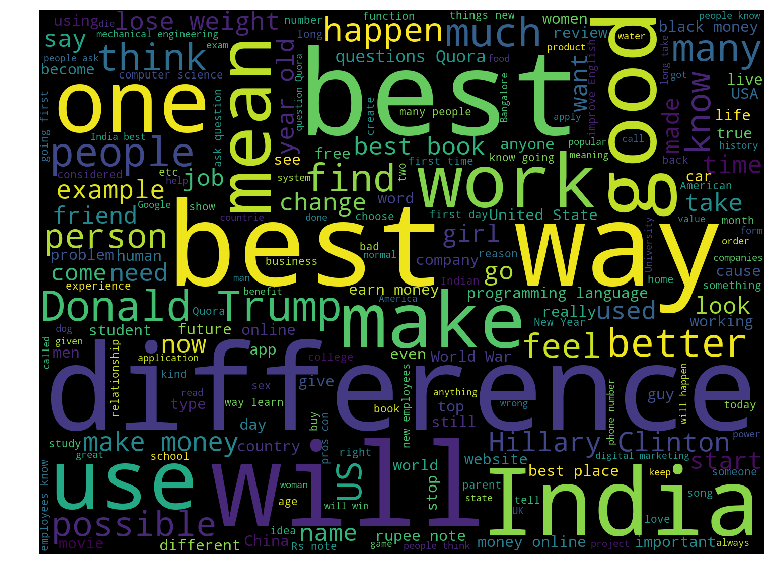

In [173]:
cloud = WordCloud(width=1440, height=1080).generate(qs_text)
plt.figure(figsize=(15, 10))
plt.imshow(cloud);
plt.axis('off');
#Word Clouds on a image - https://github.com/amueller/word_cloud/blob/master/examples/alice_colored.png

### Visualizing Word Vectors with t-SNE

https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (For e.g. 100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words.

In [174]:
df_train = pd.read_csv('data/train.csv')
df_train = df_train.sample(frac=0.1,random_state=82) #t-sne works best on smaller datasets, so fraction=0.1
#Dropping NA
df_train = df_train.dropna()
print(df_train.shape)

(40429, 6)


In [175]:
#Convert to lowercase
df_train.loc[:,'question1'] = df_train.question1.apply(lambda x: x.lower())
df_train.loc[:,'question2'] = df_train.question2.apply(lambda x: x.lower())

In [176]:
#Remove chars that are not letters or numbers
regex = re.compile(r'\W+')

df_train.loc[:,'question1'] = df_train.question1.apply(lambda x: regex.sub(' ',x))
df_train.loc[:,'question2'] = df_train.question2.apply(lambda x: regex.sub(' ',x))

In [177]:
#Remove stop words
stops = set(stopwords.words("english")) #stops
stops = stops.union(['I'])

df_train.loc[:,'question1'] = df_train['question1'].apply(lambda x: x.split(' ')) 
df_train.loc[:,'question1'] = df_train['question1'].apply(lambda x: [word for word in x if word not in stops])

df_train.loc[:,'question2'] = df_train['question2'].apply(lambda x: x.split(' ')) 
df_train.loc[:,'question2'] = df_train['question2'].apply(lambda x: [word for word in x if word not in stops])


In [178]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
226281,226281,990,32437,"[major, highways, california, compared, major, highways, tennessee, ]","[major, highways, california, compared, major, highways, washington, ]",0
325560,325560,451819,451820,"[person, live, without, friends, ]","[live, without, friends, ]",0
279028,279028,23243,398388,"[country, india, ever, demonetization, currency, notes, ]","[india, currency, weaker, currencies, western, countries, ]",0
353759,353759,288414,482855,"[school, jrotc, ]","[jrotc, ]",0
285870,285870,235298,285353,"[feel, like, live, rv, trailer, ]","[like, live, rv, travel, ]",1


In [179]:
porter = PorterStemmer()
df_train['question1'] = df_train['question1'].apply(lambda x: [porter.stem(word) for word in x] )
df_train['question2'] = df_train['question2'].apply(lambda x: [porter.stem(word) for word in x] )

In [180]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
226281,226281,990,32437,"[major, highway, california, compar, major, highway, tennesse, ]","[major, highway, california, compar, major, highway, washington, ]",0
325560,325560,451819,451820,"[person, live, without, friend, ]","[live, without, friend, ]",0
279028,279028,23243,398388,"[countri, india, ever, demonet, currenc, note, ]","[india, currenc, weaker, currenc, western, countri, ]",0
353759,353759,288414,482855,"[school, jrotc, ]","[jrotc, ]",0
285870,285870,235298,285353,"[feel, like, live, rv, trailer, ]","[like, live, rv, travel, ]",1


In [181]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].iteritems():
            corpus.append(sentence[1])
            
    return corpus

corpus = build_corpus(df_train)        
corpus[0:2]

[['major',
  'highway',
  'california',
  'compar',
  'major',
  'highway',
  'tennesse',
  ''],
 ['person', 'live', 'without', 'friend', '']]

In [183]:
len(corpus)

80858

In [185]:
model = word2vec.Word2Vec(corpus, size=100, window=10, min_count=500, workers=4, seed=82)
#model.wv['trump']

In [186]:
model.corpus_count

80858

In [187]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in sorted(model.wv.vocab):
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', method='exact', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.xlabel('TSNE Component1')
    plt.ylabel('TSNE Component2')
    plt.show()

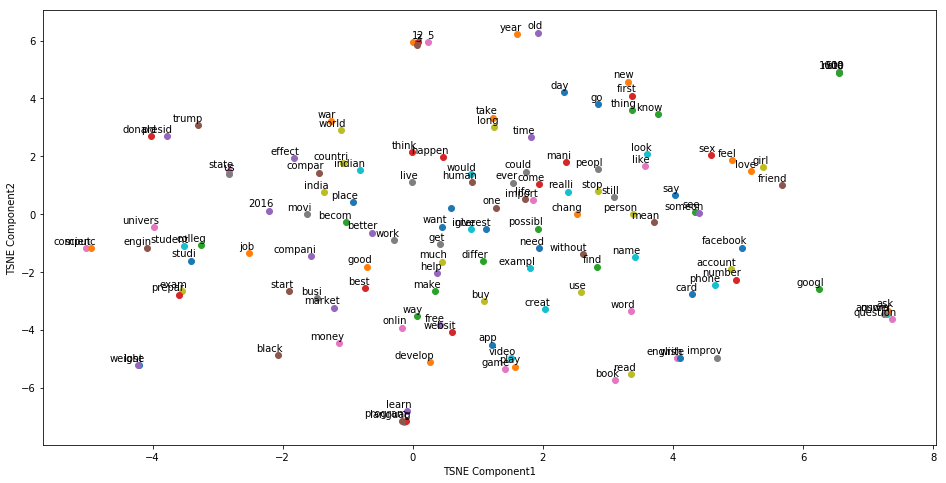

In [99]:
tsne_plot(model)

Similar words are group together. For e.g. 'univers', 'colleg', 'student' (Stemmed words)

In [188]:
model.wv.most_similar('learn')

[('languag', 0.8885955214500427),
 ('program', 0.8874126076698303),
 ('c', 0.8584209680557251),
 ('start', 0.668184757232666),
 ('develop', 0.656201958656311),
 ('english', 0.6460927128791809),
 ('book', 0.6453262567520142),
 ('websit', 0.6379057168960571),
 ('market', 0.5971551537513733),
 ('good', 0.5817643404006958)]

In [189]:
#model.wv.vocab["india"].count, #model.wv.vocab
len(model.wv.vocab.items())

132

In [191]:
#for word, vocab_obj in model.wv.vocab.items():
#    print(vocab_obj,word)

<a id='mds'></a>

## [Multi-Dimensional Scaling](http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)

** Comparing PCA and MDS **


PCA and MDS both used for reducing dimensionality of data. 

PCA tries to use optimization for retained variance, and on the other hand, MDS tries to retain the relative distances as much as possible when reducing the dimensions. This is useful when we have a high-dimensional dataset and want to get a visual impression.  
[[Building Machine Learning Systems with Python  By: Willi Richert; Luis Pedro Coelho](http://totoharyanto.staff.ipb.ac.id/files/2012/10/Building-Machine-Learning-Systems-with-Python-Richert-Coelho.pdf)]

PCA is flexible, fast, and easily interpretable, it does not perform so well when there are nonlinear relationships within the data.


*Scikit Learn - Manifold Learning* 

http://scikit-learn.org/stable/modules/manifold.html 
MDS is part of manifold learning on Scikit Learn. Lot more methods for non linear dimensionality reduction. 


https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

---

**Note about Dissimiliarity vs. Similarity measures**


Similarity - How alike two objects are, minimum 0 => Not alike, maximum 1 => complete similarity  (Correlation coefficient, Cosine Similarity) 

Dissimilarity - How different two objects are, minimum 0 (same object), maximum $\infty$ => Not at all similar (different objects) = Euclidean distance



### A simple example

In [192]:
#Dataset from R USCitiesD (library datasets)
#UScitiesD gives “straight line” distances between 10 cities in the US.
uscitiesd = pd.read_csv("data/UScitiesD.csv")
uscitiesd

,0,Atlanta,Chicago,Denver,Houston,LosAngeles,Miami,NewYork,SanFrancisco,Seattle,Washington.DC
0,Atlanta,0,587,1212,701,1936,604,748,2139,2182,543
1,Chicago,587,0,920,940,1745,1188,713,1858,1737,597
2,Denver,1212,920,0,879,831,1726,1631,949,1021,1494
3,Houston,701,940,879,0,1374,968,1420,1645,1891,1220
4,LosAngeles,1936,1745,831,1374,0,2339,2451,347,959,2300
5,Miami,604,1188,1726,968,2339,0,1092,2594,2734,923
6,NewYork,748,713,1631,1420,2451,1092,0,2571,2408,205
7,SanFrancisco,2139,1858,949,1645,347,2594,2571,0,678,2442
8,Seattle,2182,1737,1021,1891,959,2734,2408,678,0,2329
9,Washington.DC,543,597,1494,1220,2300,923,205,2442,2329,0


In [193]:
x = uscitiesd.iloc[:,1:]
Euclid_dist = euclidean_distances(x)

#Default metric = True, for NonMetric set metric=False
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=99)  

mds_fit = mds.fit_transform(Euclid_dist)  # shape (n_samples, n_components)

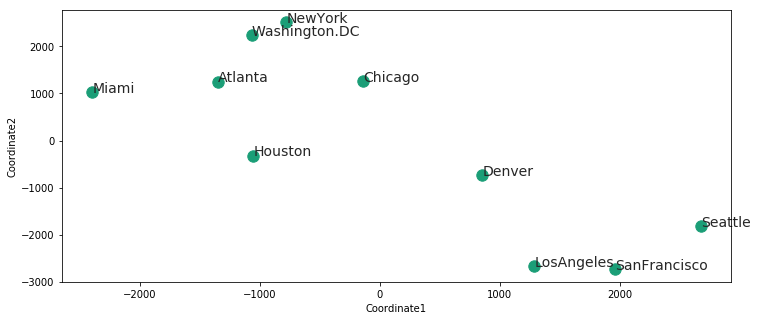

In [194]:
x1 = mds_fit[:,0]
y1 = mds_fit[:,1]
n = uscitiesd.iloc[:,0:1]

fig, ax = plt.subplots(figsize=(12,5))

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
shade_black = '#262626'
ax.scatter(x1,y1, s = 130, zorder=0, c=dark2_colors[0])

for i, txt in enumerate(n.values):
    ax.annotate(txt[0], (x1[i],y1[i]), zorder=1, size=14, color=shade_black)
    
ax.set_xlabel('Coordinate1')
ax.set_ylabel('Coordinate2');

We see that relative distances are preserved between cities.

## MDS on a text dataset

#### Sentiment Labelled Sentences Dataset 
http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

We will only use amazon data.

````
Data Set Information:

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015 
Please cite the paper if you want to use it :) 

It contains sentences labelled with positive or negative sentiment. 

======= 
Format: 
======= 
sentence score 

======= 
Details: 
======= 
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields: 

imdb.com 
amazon.com 
yelp.com 

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected. 
````


In [195]:
amazon = pd.read_csv("data/sentiment_labelled_sentences/amazon_cells_labelled.txt", header=None,delimiter="\t",  quoting=3)    
amazon.columns = ['sentence','sentiment']

In [196]:
print(amazon.shape)
print(amazon.sentiment.value_counts())
pd.set_option('display.max_colwidth', 200)
amazon.head()

(1000, 2)
1    500
0    500
Name: sentiment, dtype: int64


,sentence,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [197]:
pd.set_option('display.max_colwidth', 50) #Setting it back to default

In [198]:
#Punctuation
amazon['sentence']=amazon.sentence.str.lower()
amazon['sentence']=amazon.sentence.str.replace("[^a-zA-Z]", " ",)  #Remove all punctuations/numbers. 
#You may want remove punctuations or keep them and count how many !, ; etc in data

In [199]:
#Stemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    #for word in text.split():
    #    print(word, porter.stem(word))
    return [porter.stem(word) for word in text.split()]

In [200]:
all_stopwords = stopwords.words('english') 

In [201]:
#TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features.

vectorizer = TfidfVectorizer(tokenizer = tokenizer_porter,
                             stop_words=all_stopwords,
                             use_idf=False,
                             max_features = 100,ngram_range=(1,1))
train_data_features = vectorizer.fit_transform(amazon.sentence.values)
train_data_features = train_data_features.A #toarray()  
vocab = vectorizer.get_feature_names()

In [202]:
vocab[:10]

['also',
 'ani',
 'bad',
 'batteri',
 'becaus',
 'best',
 'better',
 'bluetooth',
 'bought',
 'buy']

In [203]:
df = pd.DataFrame()
df = pd.DataFrame(data=train_data_features,columns=vocab)

In [205]:
CS_dist = 1 - cosine_similarity(train_data_features)

num_samples, num_features = train_data_features.shape
print ("num_samples:  %d, num_features: %d" %(num_samples,num_features))

num_samples:  1000, num_features: 100


In [206]:
print(df.shape,  CS_dist.shape) 

(1000, 100) (1000, 1000)


In [207]:
# The CS distance matrix comes from the above TF-IDF vectorization
# and as such is 'pre-computed' random state is specified.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=99)
text_MDS = mds.fit_transform(CS_dist)  # shape (n_components, n_samples)
text_MDS.shape

(1000, 2)

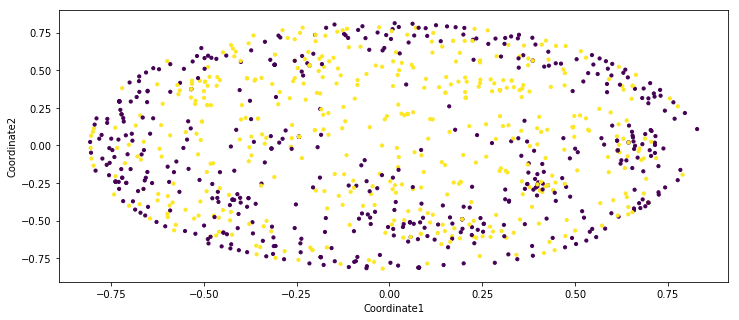

In [245]:
x1 = text_MDS[:,0]
y1 = text_MDS[:,1]
n = amazon.sentiment

fig, ax = plt.subplots(figsize=(12,5))

dark2_colors = ['#1b9e77','#7570b3'] #'#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
shade_black = '#262626'
#ax.scatter(x1,y1, s = 10, zorder=0,c='gray');
ax.scatter(x1,y1, s = 10, zorder=0,c=n);

#Annotating points for phone related reviews
#phone_idx = df[df.phone!=0].index
#for i in phone_idx:
#    ax.annotate('*',(x1[i],y1[i]), color='red')
#Annotated points are related to amazon sentiments on phone. 

ax.set_xlabel('Coordinate1')
ax.set_ylabel('Coordinate2');

Color - yellow and purple is amazon review sentiment 1 or 0. See comment in code for annotating points (in red) related to phone. 

In [247]:
#amazon.iloc[phone_idx,]

<a id='spooky'></a>

### Spooky Author Identification

https://www.kaggle.com/c/spooky-author-identification



The competition dataset contains text from works of fiction written by spooky authors of the public domain:

- Edgar Allan Poe (EAP)
- HP Lovecraft (HPL)
- Mary Wollstonecraft Shelley (MWS)

The objective is to accurately identify the author of the sentences in the test set.

Classification task with text data. 

Target variable is author name ie. Edgar Allen Poe (EAP), HP Lovecraft (HPL) and Mary Shelley (MWS).


In [213]:
# Loading in the training data with Pandas
train = pd.read_csv("data/spooky_train.csv")
print(train.shape)
pd.set_option('display.max_colwidth' ,125)
train.head()

(19579, 3)


,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, an...",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he...",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy ...",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals ...",HPL


In [214]:
pd.set_option('display.max_colwidth' ,50) #default
#Target variable distribution
print(train.author.value_counts()/train.shape[0])

EAP    0.403494
MWS    0.308698
HPL    0.287808
Name: author, dtype: float64


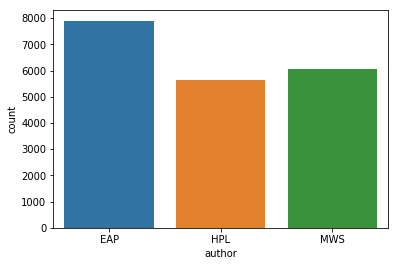

In [215]:
sns.countplot(train.author); #Target variable distribution plot

**Sentiment Analysis on Spooky Author Identification**

Inspired by this R Kernel -> https://www.kaggle.com/headsortails/treemap-house-of-horror-spooky-eda-lda

In [216]:
all_text = train.text.values

all_polarity = [TextBlob(blobs).sentiment.polarity for blobs in all_text]
train['polarity']=all_polarity
train.head()

,id,text,author,polarity
0,id26305,"This process, however, afforded me no means of...",EAP,0.625000
1,id17569,It never once occurred to me that the fumbling...,HPL,-0.500000
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0.107407
3,id27763,How lovely is spring As we looked from Windsor...,MWS,0.500000
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,0.200000


In [217]:
train['sentiment'] = np.where(train['polarity']>=0.,'Positive','Negative')
train.head()

,id,text,author,polarity,sentiment
0,id26305,"This process, however, afforded me no means of...",EAP,0.625000,Positive
1,id17569,It never once occurred to me that the fumbling...,HPL,-0.500000,Negative
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,0.107407,Positive
3,id27763,How lovely is spring As we looked from Windsor...,MWS,0.500000,Positive
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,0.200000,Positive


In [218]:
eap_pos_neg = train[train.author=='EAP'].sentiment.value_counts() / train[train.author=='EAP']['author'].value_counts()[0]
hpl_pos_neg = train[train.author=='HPL'].sentiment.value_counts() / train[train.author=='HPL']['author'].value_counts()[0]
mws_pos_neg = train[train.author=='MWS'].sentiment.value_counts() / train[train.author=='MWS']['author'].value_counts()[0] 


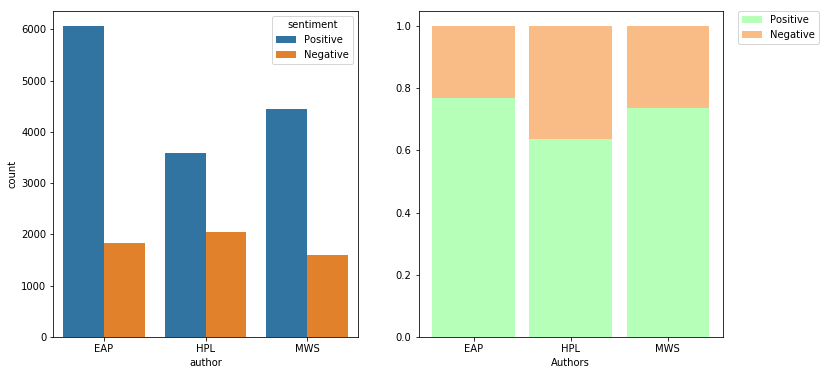

In [219]:
f, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='author',hue='sentiment',data=train, ax=ax[0]);

greenBars = [eap_pos_neg[0], hpl_pos_neg[0], mws_pos_neg[0] ] #+ve
orangeBars = [eap_pos_neg[1], hpl_pos_neg[1], mws_pos_neg[1]] #-ve #EAP,HPL,MWS
r = [0,1,2]
names = ('EAP','HPL','MWS')
ax[1].bar(r, greenBars, color='#b5ffb9',  width=0.85, label='Positive')
ax[1].bar(r, orangeBars, bottom=greenBars, color='#f9bc86', width=0.85, label='Negative')
#titles/ labels
ax[1].set_xticks(r, minor=False)
ax[1].set_xticklabels(labels=names, minor = False)
ax[1].set_xlabel("Authors")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

HPL seems to have most negative sentiments. (We could have done this 3 way as well - Positive, Neutral and Negative sentiments.)

### Feature Engineering on text data

https://www.kaggle.com/sudalairajkumar/simple-feature-engg-notebook-spooky-author

In [220]:
# Loading in the training data with Pandas
train = pd.read_csv("data/spooky_train.csv")
print(train.shape)
pd.set_option('display.max_colwidth' ,125)
train.head()

(19579, 3)


,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, an...",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he...",EAP
3,id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy ...",MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals ...",HPL


**Feature Engineering**: Different for every dataset. Here it consists of two main parts :

*Meta features* - features that are extracted from the text like number of words, number of stop words, number of punctuations etc.

*Text based features* - features directly based on the text / words like frequency, svd, word2vec etc.


Meta Features:

We will start with creating meta featues and see how good are they at predicting the spooky authors. The feature list is as follows:

- Number of words in the text
- Number of unique words in the text
- Number of characters in the text
- Number of stopwords
- Number of punctuations
- Number of upper case words
- Number of title case words
- Average length of the words
---
- Noun Phrases (Entity Recognition)

In [221]:
## Number of words in the text ##
train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train["num_chars"] = train["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
eng_stopwords = stopwords.words('english')
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
train["num_punctuations"] =train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
train["num_words_upper"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train["num_words_title"] = train["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train["mean_word_len"] = train["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of noun phrases in text ## 
all_text = train.text.values
#TextBlob(train.iloc[3][1]).noun_phrases
train['num_noun_phrases'] =  [len(TextBlob(blobs).noun_phrases) for blobs in all_text]

Before creating model, let us now plot some of our new variables to see if they will be helpful in predictions. We are looking if values are different for 3 authors. (If they are same, it may not help in classification.)

In [222]:
np.max(train.num_words)

861

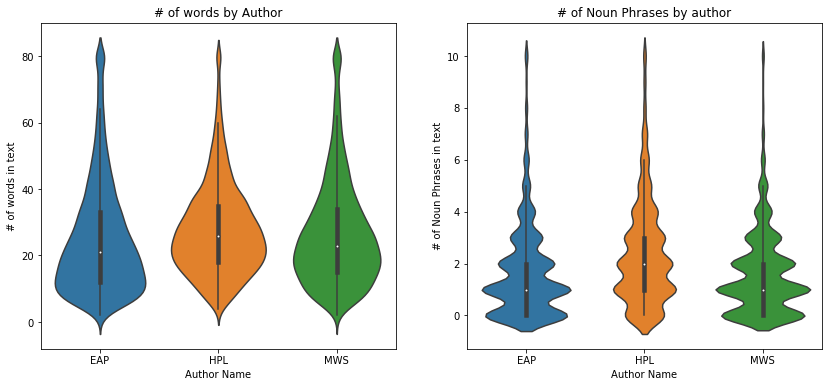

In [223]:
f, ax = plt.subplots(1,2, figsize=(14,6))

train.loc[train.num_words>80,'num_words'] = 80 #truncation for better visuals

sns.violinplot(x='author', y='num_words', data=train , ax = ax[0] )
ax[0].set_xlabel("Author Name")
ax[0].set_ylabel("# of words in text")
ax[0].set_title('# of words by Author');

train.loc[train['num_noun_phrases']>10, 'num_noun_phrases'] = 10 #truncation for better visuals
sns.violinplot(x='author', y='num_noun_phrases', data=train, ax = ax[1])
ax[1].set_xlabel("Author Name")
ax[1].set_ylabel("# of Noun Phrases in text")
ax[1].set_title('# of Noun Phrases by author');

- \# of words by Author: EAP seems to have slightly lesser number of words (median) than MWS and HPL.
- \# of noun phrases by Author: This also seems to useful, Median number of noun phrases is higher for HPL compared with EAP and MWS.

[What's a Violin Plot?](https://blog.modeanalytics.com/violin-plot-examples/) 


**Text Based Features **

One of the basic features which we could create is tf-idf values of the words present in the text. So we can start with that one.

In [224]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
train_tfidf = tfidf_vec.fit_transform(train['text'].values.tolist())


In [225]:
len(tfidf_vec.get_feature_names()), type(train_tfidf), train_tfidf.shape

(397066, scipy.sparse.csr.csr_matrix, (19579, 397066))

**SVD on TFIDF features (aka Latent Semantic Analysis or Latent Semantic Indexing)**

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

Since the tfidf vectors are sparse, one another way of compressing the information and representing it in a much compact way is through SVD.  So we could created svd features on word tfidf and add them to our feature set.


### Latent Semantic Analysis  (aka Singular Value Decomposition SVD) 

**Difference between SVD and PCA :** (From Scikit Learn Cookbook - Trent Hauck)

Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that factors a matrix M into the three matrices U, $\sum $, and V. This is very similar to PCA, except that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix. Typically, SVD is used under the hood to find the principle components of a matrix.

Truncated SVD is different from regular SVDs in that it produces a factorization where the number of columns is equal to the specified truncation. For example, given an n x n matrix, SVD will produce matrices with n columns, whereas truncated SVD will produce matrices with the specified number of columns. This is how the dimensionality is reduced.

One advantage of TruncatedSVD over PCA is that TruncatedSVD can operate on sparse matrices while PCA cannot. This is due to the fact that the covariance matrix must be computed for PCA, which requires operating on the entire matrix.

---

In [226]:
n_comp = 20
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(train_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
print(train_svd.shape)

(19579, 20)


In [136]:
train_svd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.024609,-0.015751,-0.001339,-0.001979,-0.010276,-0.007060,0.005273,-0.004685,-0.005327,-0.009589,0.004172,-0.008512,-0.004016,-0.005520,-0.009685,-0.017940,0.005566,0.015159,-0.019618,0.017224
1,0.009082,-0.005800,-0.001591,-0.000796,-0.003567,-0.003482,0.002589,0.003770,0.000546,-0.001546,-0.001353,-0.000745,0.003105,-0.001627,-0.001416,-0.001259,0.000983,0.005059,-0.001885,0.002630
2,0.027687,-0.018365,-0.004288,-0.010366,-0.016913,-0.005624,-0.003705,0.001367,-0.003582,-0.016985,-0.005296,-0.016537,-0.014208,-0.018889,-0.022447,-0.000254,-0.017743,-0.016106,-0.038306,0.012865
3,0.027062,-0.019737,-0.000586,-0.012895,-0.010778,-0.003789,-0.009014,-0.006918,-0.012768,-0.003230,-0.015503,0.008192,-0.003362,-0.014578,0.019239,0.011160,0.011395,-0.030649,0.006688,0.001704
4,0.011281,-0.008998,-0.000729,-0.002310,-0.001980,-0.001555,-0.000852,0.000261,-0.002798,-0.005514,-0.003800,-0.000928,-0.005549,-0.004979,-0.003777,0.002286,-0.004240,-0.004061,0.002276,0.003985


We'll leave this dataset here, since we are not trying to make a submission. We could create a model with SVD features and other meta features and create a classification model. 